In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.shape

(614, 13)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.shape

(614, 13)

### Loan_ID column is no use, so drop that

In [9]:
df.drop('Loan_ID', axis=1, inplace=True)
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
cols = ['LoanAmount','Loan_Amount_Term','Credit_History','Gender','Married','Self_Employed','Dependents']

for i in cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
126,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
136,Female,Yes,0,Graduate,No,4583,0.0,84.0,360.0,1.0,Rural,N
508,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
364,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
22,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
537,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
40,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N
84,Male,Yes,1,Graduate,No,3988,0.0,50.0,240.0,1.0,Urban,Y
394,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,Y


In [13]:
print(df.Property_Area.unique())
print(df.Education.unique())
print(df.Self_Employed.unique())

['Urban' 'Rural' 'Semiurban']
['Graduate' 'Not Graduate']
['No' 'Yes']


In [14]:
df.Gender.replace({"Male":0, "Female":1}, inplace=True)
df.Married.replace({"No":0, "Yes":1}, inplace=True)
df.Education.replace({"Not Graduate":0, "Graduate":1}, inplace=True)
df.Self_Employed.replace({"No":0, "Yes":1}, inplace=True)
df.Property_Area.replace({"Rural":0, "Urban":1, "Semiurban":2}, inplace=True)
df.Loan_Status.replace({"N":0, "Y":1}, inplace=True)
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
127,0,0,0,1,0,3865,1640.0,120.0,360.0,1.0,0,1
216,0,1,0,1,0,150,1800.0,135.0,360.0,1.0,0,0
24,0,1,1,1,0,3717,2925.0,151.0,360.0,1.0,2,0
368,0,1,1,1,0,6325,0.0,175.0,360.0,1.0,2,1
169,0,1,2,1,0,8000,0.0,200.0,360.0,1.0,2,1


In [15]:
df.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1


In [16]:
df.shape

(614, 12)

In [17]:
# loan amount for months :
df.Loan_Amount_Term=df.Loan_Amount_Term / 12
df.Loan_Amount_Term = df.Loan_Amount_Term.astype('int')
df.sample(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
473,1,0,0,1,1,2500,0.0,93.0,30,1.0,1,1
241,0,1,1,0,0,2510,1983.0,140.0,15,1.0,1,0
411,0,1,0,1,0,6256,0.0,160.0,30,1.0,1,1
123,0,1,2,1,0,2957,0.0,81.0,30,1.0,2,1
265,0,0,0,1,0,4095,3447.0,151.0,30,1.0,0,1
456,0,1,0,1,0,4301,0.0,118.0,30,1.0,1,1


In [18]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [19]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
278,0,1,0,1,0,14583,0.0,436.0,30,1.0,2,1
513,0,1,0,1,0,2130,6666.0,70.0,15,1.0,2,0
279,1,1,0,0,0,4100,0.0,124.0,30,1.0,0,1
511,0,1,1,1,0,6065,2004.0,250.0,30,1.0,2,1
475,0,1,2,1,1,16525,1014.0,150.0,30,1.0,0,1


In [20]:
df.Dependents = df.Dependents.str.split('+').str[0]
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
235,0,1,1,1,0,5500,1260.0,170.0,30,1.0,0,1
217,0,1,0,1,0,3727,1775.0,131.0,30,1.0,2,1
542,1,0,1,1,0,3652,0.0,95.0,30,1.0,2,1
479,0,1,2,1,0,2947,1603.0,120.0,30,1.0,1,0
343,0,1,3,0,0,3173,0.0,74.0,30,1.0,2,1


In [21]:
# below 6 month, can't provide loan
#df.drop(df[df.Loan_Amount_Term <= 6].index, inplace=True)

In [22]:
df.ApplicantIncome = df.ApplicantIncome/100
#df.CoapplicantIncome = df.CoapplicantIncome/100
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
548,1,0,0,1,0,50.00,0.0,103.0,30,0.0,2,0
371,0,1,2,1,0,51.85,0.0,155.0,30,1.0,2,1
12,0,1,2,1,0,30.73,8106.0,200.0,30,1.0,1,1
73,0,1,3,0,0,47.55,0.0,95.0,30,0.0,2,0
486,0,0,2,1,0,35.47,0.0,80.0,30,0.0,0,0


In [23]:
df.duplicated().sum()

0

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

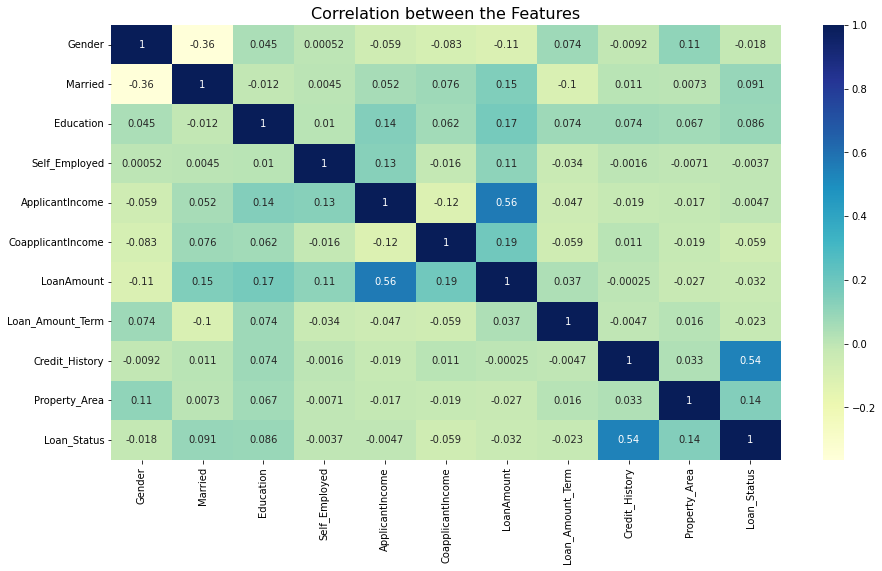

In [26]:

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/li

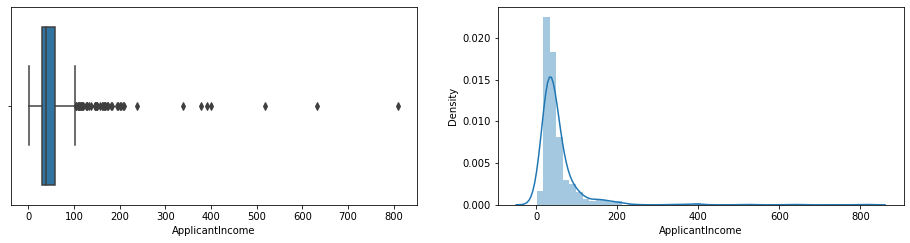

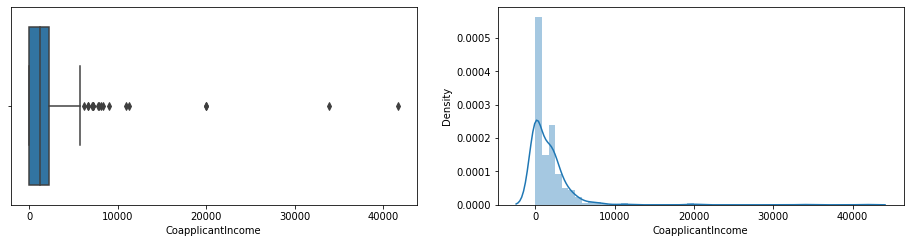

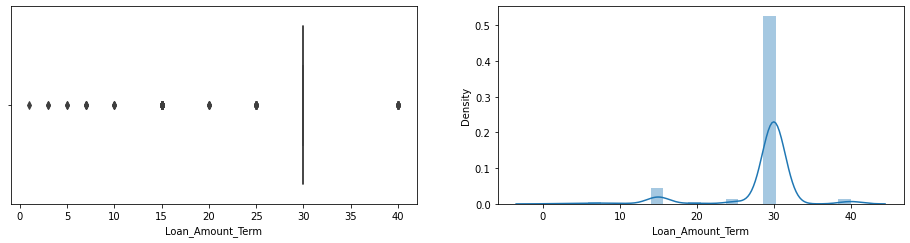

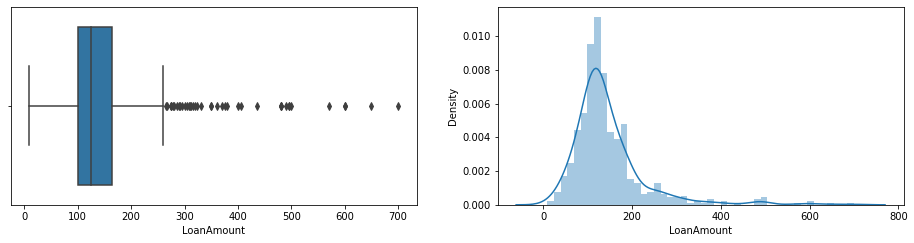

In [27]:
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term', 'LoanAmount']

for i in cols:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    plt.subplot(2,2,d)
    sns.distplot(df[i])
    c=c+2
    d=d+1

### some outliers are there

In [28]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,58.49,0.0,120.0,30,1.0,1,1
1,0,1,1,1,0,45.83,1508.0,128.0,30,1.0,0,0
2,0,1,0,1,1,30.00,0.0,66.0,30,1.0,1,1


### let's find outliers count

In [29]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,58.49,0.0,120.0,30,1.0,1,1
1,0,1,1,1,0,45.83,1508.0,128.0,30,1.0,0,0
2,0,1,0,1,1,30.00,0.0,66.0,30,1.0,1,1


In [30]:
# df.drop(columns=['Dependents','Credit_History'], inplace=True)

In [31]:
def outliers_shape(col_name):
    try :
            # Finding the IQR
            percentile25 = df[col_name].quantile(0.25)
            percentile75 = df[col_name].quantile(0.75)
            iqr = percentile75 - percentile25
            
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
            
            
            # Finding Outliers
            size = df[df[col_name] > upper_limit]

            print(size.shape)
            
    except Exception as e :
        print('error is : ', e)

In [32]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(50, 12)
(18, 12)
(41, 12)


### Let's cap all

### There are 50 rows are outliers, so we cap them instead of removing

In [33]:
def cap_outliers (col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[col] = np.where(
        df[col] > upper_limit,
        upper_limit,
        np.where(
            df[col] < lower_limit,
            lower_limit,
            df[col]
        )
    )

In [34]:
colss = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in colss:
    cap_outliers(i)

In [35]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(0, 12)
(0, 12)
(0, 12)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/li

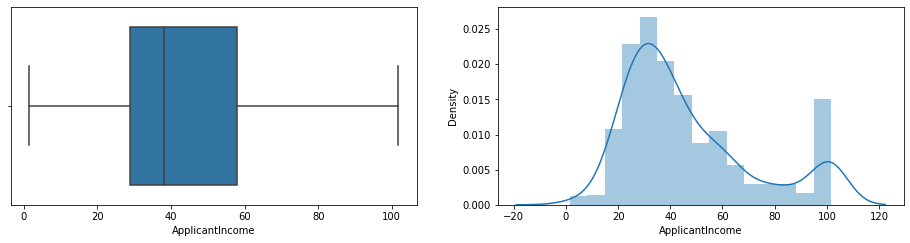

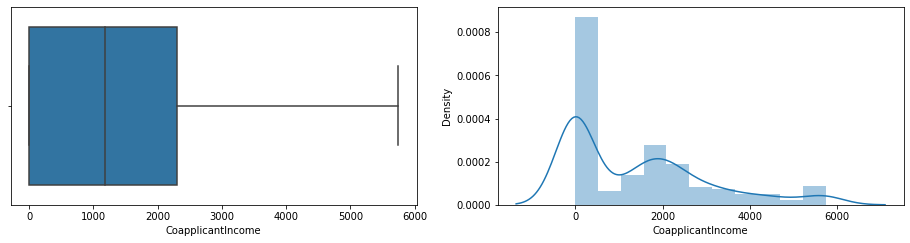

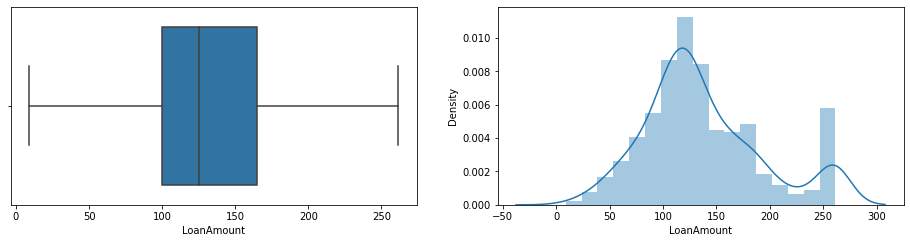

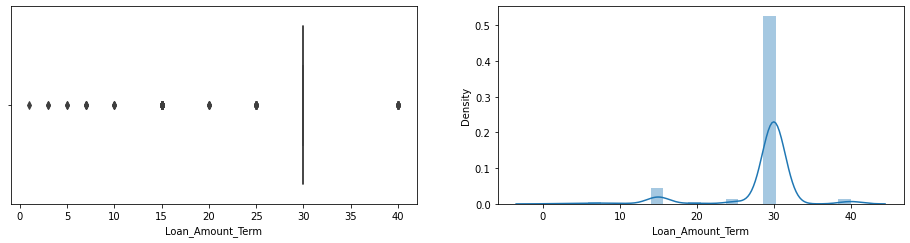

In [36]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in cols:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    plt.subplot(2,2,d)
    sns.distplot(df[i])
    c=c+2
    d=d+1

In [37]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
434,0,0,0,1,0,37.5000,0.0,100.0,30,1.0,1,1
429,0,0,0,0,0,27.1700,0.0,60.0,15,1.0,1,1
119,1,0,0,1,0,101.7125,0.0,259.0,30,1.0,1,1
243,0,1,2,1,1,62.5000,1300.0,108.0,30,1.0,0,1
592,0,0,3,1,1,93.5700,0.0,261.5,30,1.0,2,1


In [38]:
cols = ['LoanAmount','Loan_Amount_Term','Dependents','Credit_History']
for i in cols:
    df[i] = df[i].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 62.4 KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/li

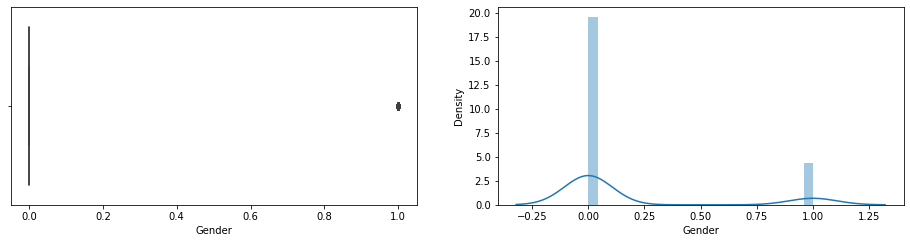

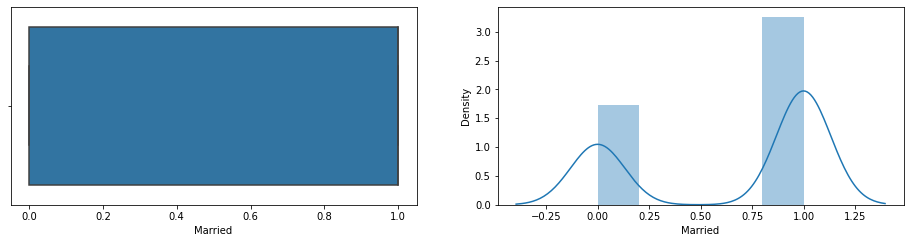

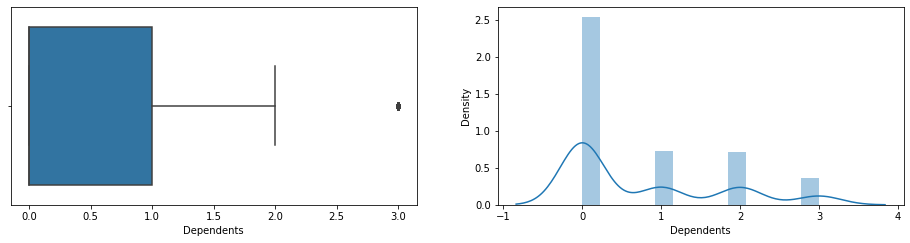

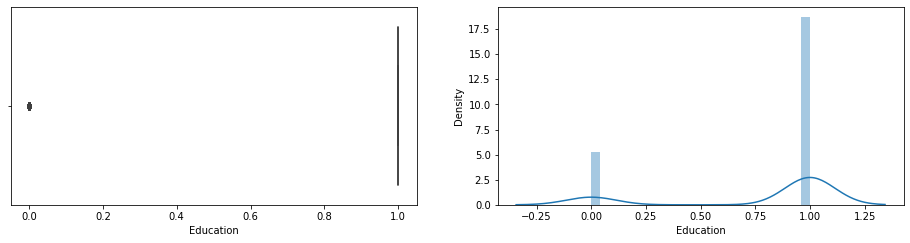

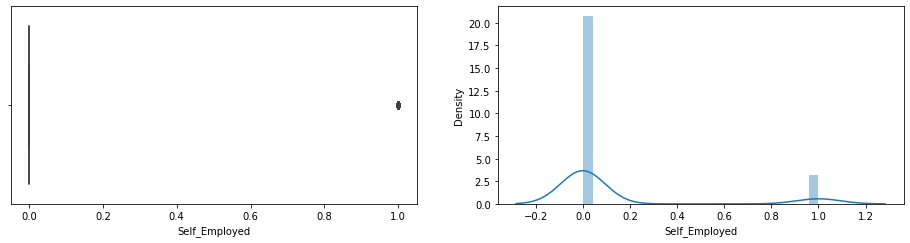

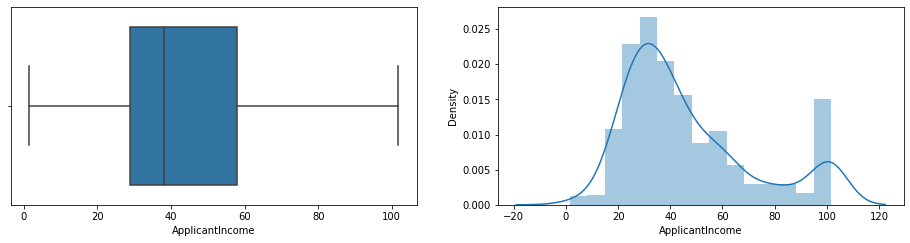

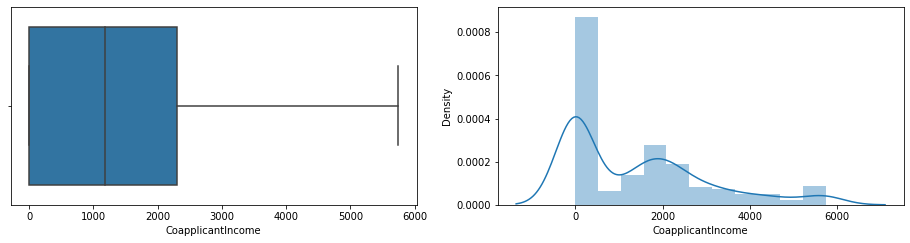

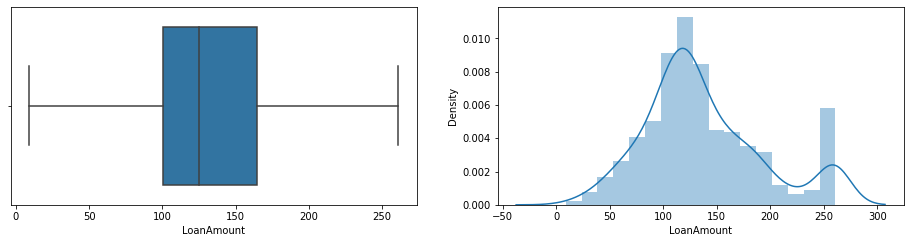

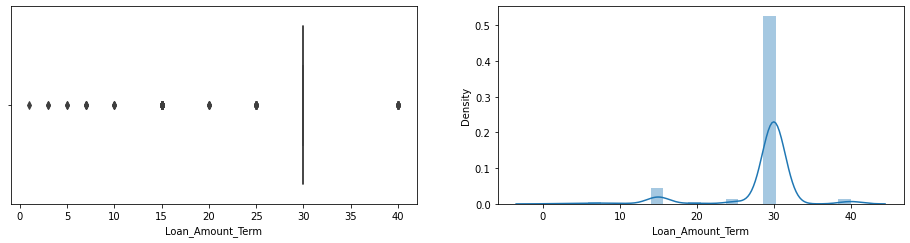

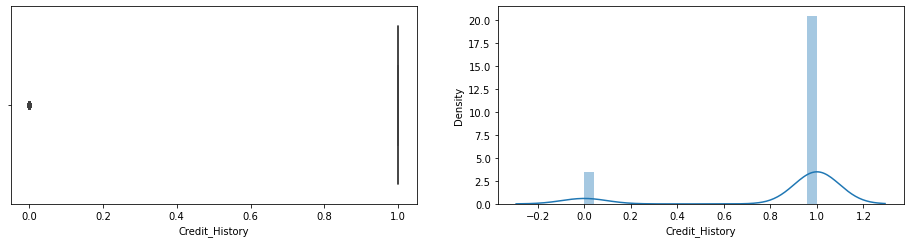

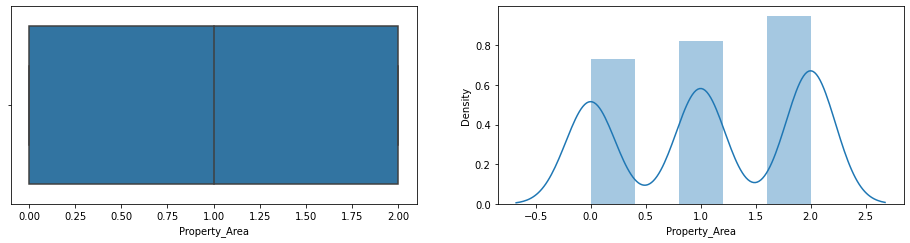

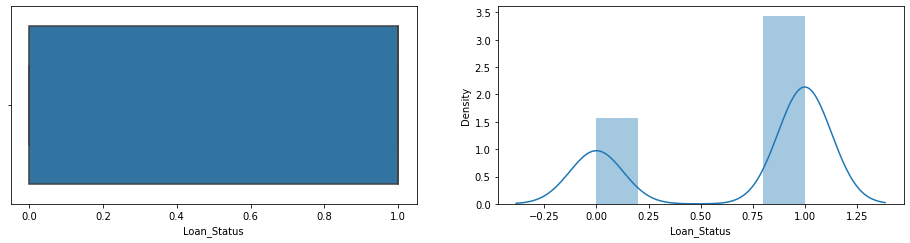

In [40]:
for i in df.columns:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    plt.subplot(2,2,d)
    sns.distplot(df[i])
    c=c+2
    d=d+1

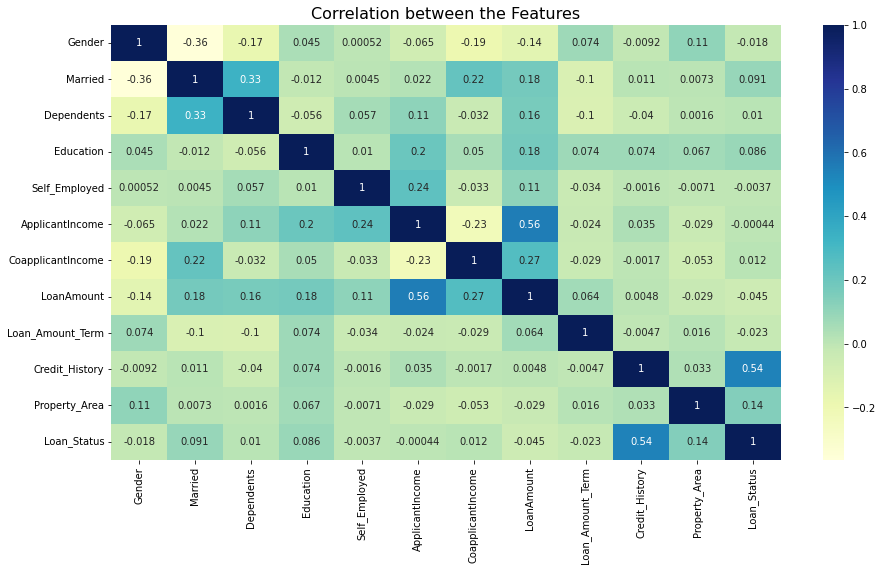

In [41]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [42]:
df.drop(columns=['Dependents','Self_Employed','CoapplicantIncome'], inplace =True)
df.shape

(614, 9)

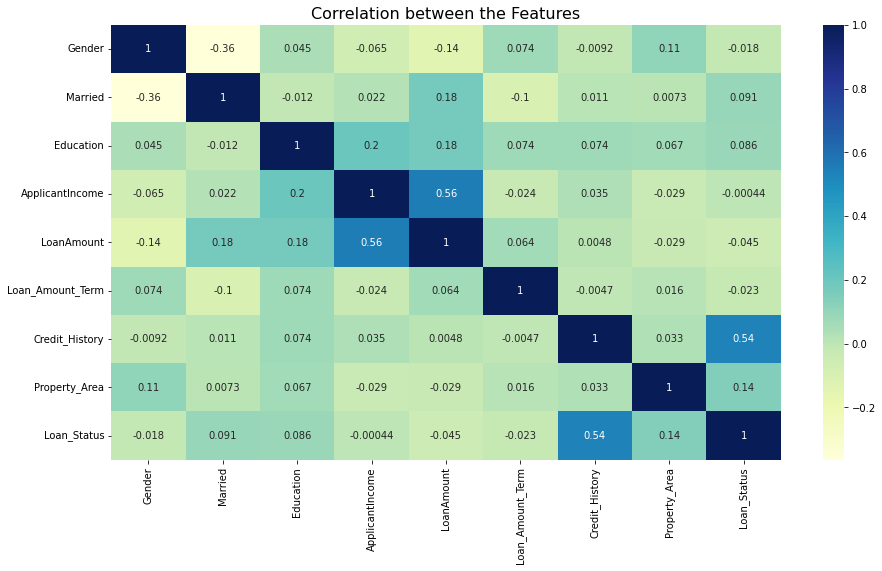

In [43]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [44]:
df1=df.copy()
df1.head()

,Gender,Married,Education,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,58.49,120,30,1,1,1
1,0,1,1,45.83,128,30,1,0,0
2,0,1,1,30.00,66,30,1,1,1
3,0,1,0,25.83,120,30,1,1,1
4,0,0,1,60.00,141,30,1,1,1


In [45]:
# train_test_split
from sklearn.model_selection import train_test_split

X=df1.drop(columns=('Loan_Status'))
y=df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.07)
X_train.shape, X_test.shape

((571, 8), (43, 8))

In [46]:
X_train.head(3)

,Gender,Married,Education,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
366,0,0,1,25.00,96,40,1,2
500,1,0,1,6.45,113,40,1,0
378,0,0,1,30.69,71,40,1,1


In [47]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# fit and transform the data
#X_train = scaler.fit_transform(X_train)

# check the mean and standard deviation of the transformed data
#print(np.mean(X_train, axis=0)) # should be approximately [0, 0, 0]
#print(np.std(X_train, axis=0))

#sns.distplot(np.mean(X_train, axis=0))

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.ensemble import VotingClassifier,StackingClassifier
from xgboost import XGBClassifier

In [49]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

Accuracy :  0.9069767441860465
R2 score:  0.5763546798029557
Mean absolute error:  0.09302325581395349


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [50]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=80,
                               min_samples_split=9,
                               random_state=64)
model2.fit(X_train, y_train)
y_predict = model2.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

Accuracy :  0.9069767441860465
R2 score:  0.5763546798029557
Mean absolute error:  0.09302325581395349


In [51]:
# adaboost
ada = AdaBoostClassifier(n_estimators=15,learning_rate=1.0)

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.47044334975369473
MAE 0.11627906976744186


In [52]:
#  grid search - adaboost
param_grid = {'n_estimators': [10, 30,50,80], 'learning_rate': [0.01,0.1,0.2,0.3],}

# Initialize the model
model = AdaBoostClassifier()

# Initialize GridSearchCV
grid_search_ada = GridSearchCV(model, param_grid, cv=6)

# Fit the GridSearchCV to the data
grid_search_ada.fit(X_train, y_train)
y_predict = grid_search_ada.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

# Print the best parameters
print(grid_search_ada.best_params_)

Accuracy :  0.8837209302325582
R2 score:  0.47044334975369473
Mean absolute error:  0.11627906976744186
{'learning_rate': 0.01, 'n_estimators': 10}


In [53]:
# grid search - random forest

param_grid = {'n_estimators': [50, 150,250,300], 'max_depth': [6,7,8,9,10],}

# Initialize the model
model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rand = GridSearchCV(model, param_grid, cv=6)

# Fit the GridSearchCV to the data
grid_search_rand.fit(X_train, y_train)
y_predict = grid_search_rand.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

# Print the best parameters
print(grid_search_rand.best_params_)

Accuracy :  0.8837209302325582
R2 score:  0.47044334975369473
Mean absolute error:  0.11627906976744186
{'max_depth': 6, 'n_estimators': 250}


In [54]:
# grid search - decison tree
param_grid = {'max_depth': [50,80,120,140,160,180,200],'min_samples_split': [4,5,6,7,8,9,10]}

# Initialize the model
model = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(model, param_grid, cv=6)

# Fit the GridSearchCV to the data
grid_search_dt.fit(X_train, y_train)
y_predict = grid_search_dt.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

# Print the best parameters
print(grid_search_dt.best_params_)

Accuracy :  0.8837209302325582
R2 score:  0.47044334975369473
Mean absolute error:  0.11627906976744186
{'max_depth': 50, 'min_samples_split': 10}


In [55]:
# gradient boosting 
gbc = GradientBoostingClassifier(n_estimators=500)

gbc.fit(X_train,y_train)

y_pred = gbc.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

Accuracy :  0.8837209302325582
R2 score:  0.47044334975369473
Mean absolute error:  0.11627906976744186


In [56]:
# voting

rf = RandomForestClassifier(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
dtc = DecisionTreeClassifier(random_state=3,max_features=0.75,max_depth=50,min_samples_split=9)
xgb = XGBClassifier(n_estimators=25,learning_rate=0.3,max_depth=5)
ada = AdaBoostClassifier(n_estimators=10,learning_rate=0.01)
et = ExtraTreesClassifier(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

pipe = VotingClassifier([('rf', rf), ('dtc', dtc), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])


pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.47044334975369473
MAE 0.11627906976744186


In [59]:
ada = AdaBoostClassifier(n_estimators=10,learning_rate=0.01)
dt = DecisionTreeClassifier(max_depth=80,
                               min_samples_split=9,
                               random_state=64)
gb = GradientBoostingClassifier(n_estimators=500)
lr = LogisticRegression()

pipe1 = VotingClassifier([('ada1', ada), ('dt', dt), ('gb',gb), ('lr',lr)],weights=[5,1,1,1])


pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5763546798029557
MAE 0.09302325581395349


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
